## Machine Learning - Ex.6

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

### K-means

Implement the K-means algorithm. 

Your function should get the $n\times d$ samples matrix (one in each row) and the number of clusters K.

Init the K cluster centers $\mu_j,\ \ j=0,..,K-1$ with a random choice out of the K samples.

Then iterate the algorithm's two steps, until convergence (no change in the samples assignments):

**step 1:** sample assignment:

**step 2:** update cluster centers:

Your function should return:
1. a vector $y\in R^n$ of the final assingments:
$$y_i\in\{0,1,..,K-1\}$$
2. a matrix C ($k\times d$) with all the clusters centers (one in each row).
3. The total cost $J$ of the final solution.

Test your function on the simple 2-D data below.


hint: matplotlib's *scatter* plot might come handy for visualization: <https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html>



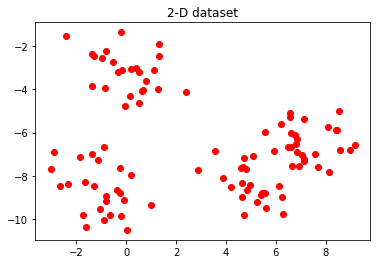

In [2]:
data=np.loadtxt('samples2D.csv', delimiter=',')
plt.plot(data[:,0],data[:,1],'or')
plt.title('2-D dataset')
plt.show()

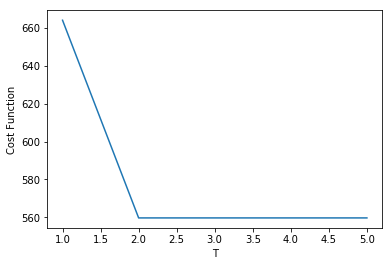

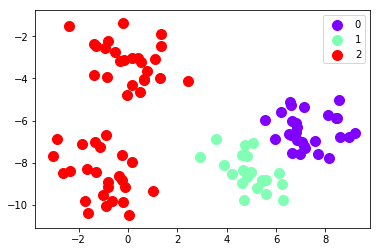

In [3]:
def J(X,C,r):
    K = r.shape[1]
    N = X.shape[0]
    cost = 0
    for j in range(0,K):
            for i in range(0,N):
                vec = X[i] - C[j]
                cost += r[i][j]*(np.dot(vec,vec))
    return cost

def kmean_step_1(X,C):
    r = np.array([[0 for i in range(0,K)] for j in range(0,X.shape[0])])
    i = 0
    for x in X:
        opt = []
        for c in C:
            vec = x-c
            opt += [np.dot(vec,vec)]
        j = opt.index(min(opt))
        r[i][j] = 1
        i = i + 1
    return r

def kmean_step_2(X,r):
    new_C = np.dot(r.T,X)
    for j in range(0,new_C.shape[0]):
        t_sum = np.sum(r[:,j])
        with np.errstate(divide='ignore',invalid='ignore'):
            vec = new_C[j] / t_sum
        new_C[j] = vec
    return new_C
        
def kmean(X,K,T):
    N = X.shape[0]
    C = []
    for i in range(0,K):
        C += [random.choice(X)]
    C = np.array(C)
    J_cost = []
    for t in range(0,T):
        r = kmean_step_1(X,C)
        C = kmean_step_2(X,r)
        J_cost += [J(X,C,r)]
    y = np.zeros(N)
    for j in range(0,K):
        for i in range(0,N):
            if (r[i][j] == 1):
                y[i] = j
    return y,C,np.array(J_cost)
T = 5
K = 3
y,C,J_cost = kmean(data,K,T)
space = np.linspace(1,T,T)
plt.plot(space,J_cost)
plt.xlabel('T')
plt.ylabel('Cost Function')
plt.show()
colors = plt.cm.rainbow(np.linspace(0, 1, K))
for i,z in enumerate(colors):
    plt.scatter(data[y==i,0], data[y==i,1],100,label=i,color=z)
plt.legend()
plt.show()


### Choosing K

In order to try and avoid local minima, you will run the k-means algorithm $N=100$ times, each time with a different random initialization, and return the results (y, C, J) of the best run (minimal J).

In order to choose the number of clusters K, run your function on the data, each time with a different value of K (try K=1,..,8).

Plot the final result for each K (scatter plot of the data with each cluster marked by a different color).

Finally, plot the final J value as a function of K, in order to choose the K.

calculating.. K= 1 out of 8
calculating.. K= 2 out of 8
calculating.. K= 3 out of 8
calculating.. K= 4 out of 8
calculating.. K= 5 out of 8
calculating.. K= 6 out of 8
calculating.. K= 7 out of 8
calculating.. K= 8 out of 8


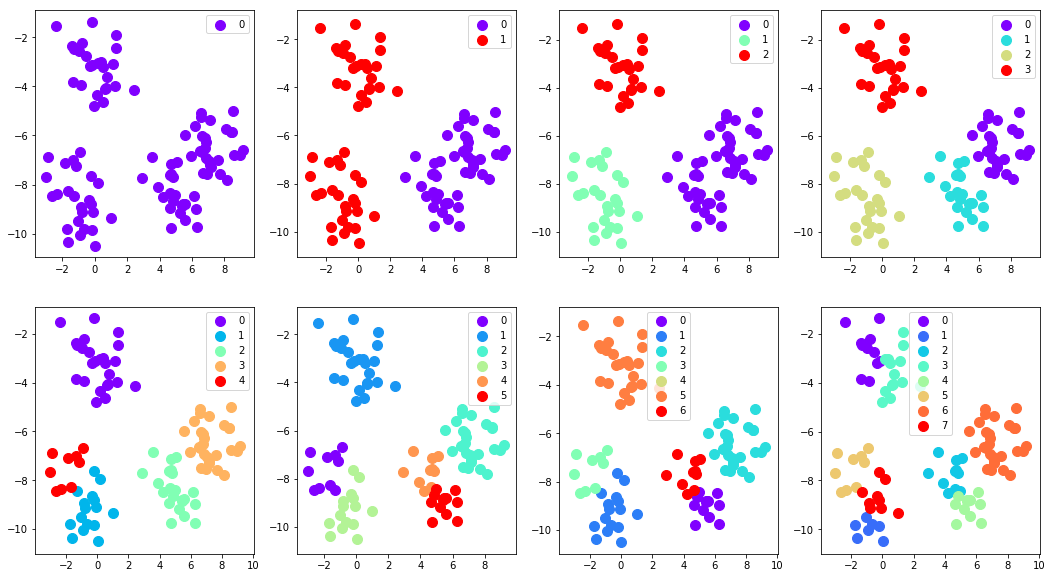

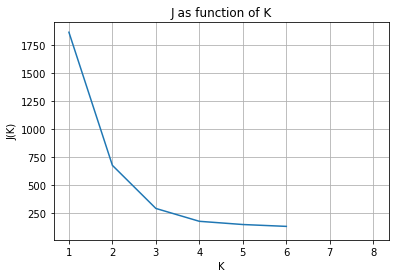

Optimal Division is for either K=3 or K=4 clusters, depending of requirements


In [4]:
def kmeans_repeat(X, K, N=100):
    
    # (should call 'kmeans' N times and pick the best solution)
    
    # your code here.. 
    T = 5
    y = []
    J_cost = []
    C = []
    for i in range(0,N):
        y_tmp,C_tmp,J_cost_tmp = kmean(X,K,T)
        y += [y_tmp]
        J_cost += [J_cost_tmp]
        C += [C_tmp]
    min_cost_indx = 0
    current_min = J_cost[0][T - 1]
    for indx in range(1,N):
        if(J_cost[indx][T - 1] < current_min):
            min_cost_indx = indx  
    return y[min_cost_indx], C[min_cost_indx], J_cost[min_cost_indx],T
plt.figure(figsize=(18,10))
J_per_k = []
total_k = 8
for K in range(1,total_k + 1):
    y,C,J_cost,T = kmeans_repeat(data,K)
    J_per_k += [J_cost[T-1]]
    print("calculating.. K=",K,"out of",total_k)
    plt.subplot(2,4,K)
    colors = plt.cm.rainbow(np.linspace(0, 1, K))
    for i,z in enumerate(colors):
        plt.scatter(data[y==i,0], data[y==i,1],100,label=i,color=z)
    plt.legend()
plt.show()
J_per_k = np.array(J_per_k)
plt.plot(range(1,total_k + 1),J_per_k)
plt.title("J as function of K")
plt.xlabel('K')
plt.ylabel('J(K)')
plt.grid()
plt.show()
print("Optimal Division is for either K=3 or K=4 clusters, depending of requirements")


### Higher dimensional data

Load the data points from the file 'samples.csv'. 

Two common ways to visualize high-dimensional data points are shown below.

Try to cluster the data points into K=1,2,...,8 clusters (as before). 

Plot J as a function of K, and choose K.

Next, use the results to visualize the data points in an ordered way.




(100, 20)


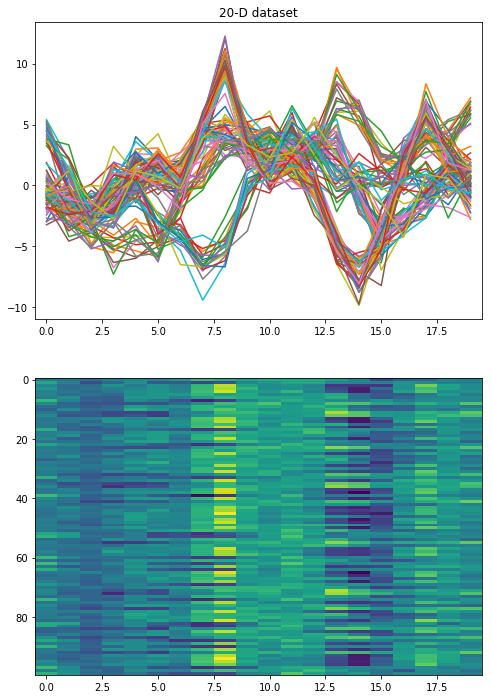

calculating.. K= 1 out of 8
calculating.. K= 2 out of 8
calculating.. K= 3 out of 8
calculating.. K= 4 out of 8
calculating.. K= 5 out of 8
calculating.. K= 6 out of 8
calculating.. K= 7 out of 8
calculating.. K= 8 out of 8


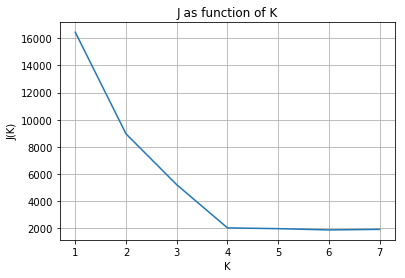

Optimal Division is for  4  clusters


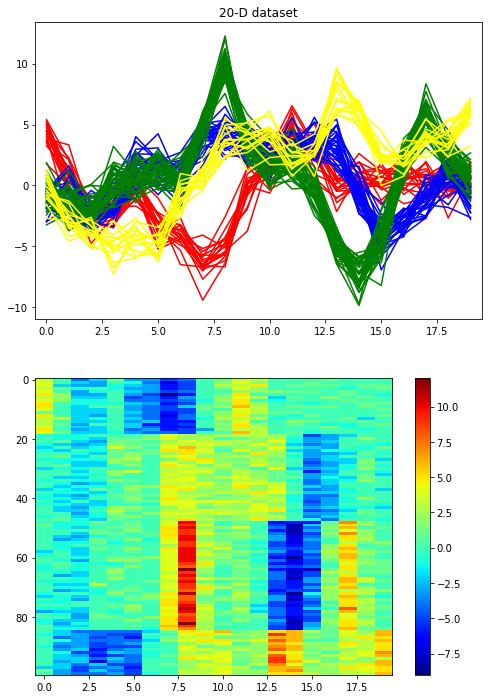

In [5]:
data=np.loadtxt('samples20D.csv', delimiter=',')

print(data.shape)
n,d = data.shape

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.plot(data.T)
plt.xlim([-0.5,19.5])
plt.title('20-D dataset')



plt.subplot(2,1,2)
plt.imshow(data,interpolation='nearest',aspect='auto')
plt.show()
# your code here.. 
J_per_k = []
y_per_k = []
total_k = 8
for K in range(1,total_k + 1):
    y,C,J_cost,T = kmeans_repeat(data,K)
    J_per_k += [J_cost[T-1]]
    y_per_k += [y]
    print("calculating.. K=",K,"out of",total_k)
J_per_k = np.array(J_per_k)
plt.plot(range(1,total_k + 1),J_per_k)
plt.title("J as function of K")
plt.xlabel('K')
plt.ylabel('J(K)')
plt.grid()
plt.show()
best_k = 4
print("Optimal Division is for ", best_k, " clusters")
colors = ['r','b','g','yellow']
clusters = y_per_k[best_k - 1]
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
for i in range(0,best_k):
    match = (clusters == i)
    plt.plot(data.T[:,match],color=colors[i])

plt.xlim([-0.5,19.5])
plt.title('20-D dataset')
plt.subplot(2,1,2)
showdata = np.array([[0 for i in range(0,data.shape[1])] for j in range(0,data.shape[0])])
startRng = 0
for i in range(0,best_k):
    match = (clusters == i)
    rowsOfMatch = np.count_nonzero(match)
    endRng = startRng + rowsOfMatch
    rng = range(startRng,endRng)
    showdata[rng,:] = data[match,:]
    startRng = endRng
plt.imshow(showdata,interpolation='nearest',aspect='auto',cmap="jet")
plt.colorbar()
plt.show()


## Good luck !